In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import stats
from PIL import ImageDraw

In [2]:
img = mpimg.imread('Apartment_Complex.jpg')

In [3]:
image_path = 'Apartment_Complex.jpg'
image = Image.open(image_path) 

In [4]:
image.show()

In [5]:
gray_image = image.convert('L') #grayscale the image
gray_image.show()

In [6]:
gray_array = np.array(gray_image)
print(gray_array.shape)

(2572, 1675)


In [7]:
gray_array

array([[252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       ...,
       [252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252]], dtype=uint8)

In [8]:
def majority_value(square):
    mode_val = stats.mode(square.flatten(), axis=None)[0]
    return mode_val

In [9]:
def image_to_grid(image_path, block_size=5):
     # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Calculate the size of the new grid
    new_width = image_array.shape[1] // block_size
    new_height = image_array.shape[0] // block_size
    
    # Create an empty array for the new grid
    grid = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Process the image in blocks
    for i in range(0, image_array.shape[0], block_size):
        for j in range(0, image_array.shape[1], block_size):
            # Extract the block
            block = image_array[i:i+block_size, j:j+block_size]
            
            # Check if the block is smaller than the expected size (at edges)
            if block.shape[0] == block_size and block.shape[1] == block_size:
                # Find the majority value in the block and assign it to the grid cell
                grid[i//block_size, j//block_size] = majority_value(block)
    
    return grid

In [10]:
image_path = 'Apartment_Complex.jpg'
grid = image_to_grid(image_path, block_size=5)
print(grid)

[[252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 ...
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]]


In [11]:
grid.shape

(514, 335)

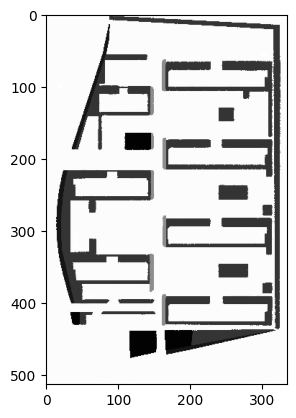

In [12]:
#plot the grid
plt.imshow(grid, cmap='gray')

In [13]:
#should be yellow
print("Yellow: ", grid[8][91])
print("Yellow: ", grid[11][151])

#should be red
print("Red: ", grid[447][125])
print("Red: ", grid[446][145])
print("Red: ", grid[456][135])

#should be green
print("Green: ", grid[40][83])

#should be blue
print("Blue: ", grid[71][255])
print("Blue: ", grid[108][278])
print("Blue: ", grid[72][308])

Yellow:  248
Yellow:  101
Red:  63
Red:  63
Red:  63
Green:  77
Blue:  101
Blue:  101
Blue:  101


In [17]:
#print 6 most common values in the grid
dictionary = {}
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i][j] in dictionary:
            dictionary[grid[i][j]] += 1
        else:
            dictionary[grid[i][j]] = 1
print(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:7])

[(252, 129044), (101, 24699), (251, 3308), (100, 3208), (63, 2975), (77, 2113), (168, 1125)]


In [22]:
def draw_circles_on_image(image_path, points, radius=10, color='red', output_path='output_image.jpg'):
    """
    Draws circles around specified points on an image.

    :param image_path: Path to the input image.
    :param points: A list of tuples, where each tuple represents the (x, y) coordinates of a point.
    :param radius: Radius of the circles to be drawn.
    :param color: Color of the circles.
    :param output_path: Path to save the image with circles.
    """
    # Load the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Draw circles around each point
    for point in points:
        y, x, width, height, angle = point
        # Draw an ellipse that will appear as a circle since all sides are equal
        draw.ellipse((x-radius, y-radius, x+radius, y+radius), outline=color)

    # Save or display the modified image
    image.save(output_path)
    plt.imshow(grid, cmap='gray')

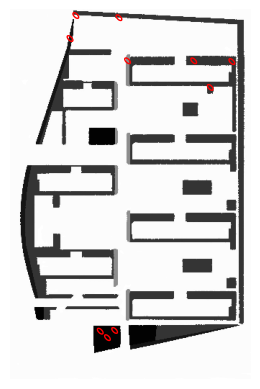

In [28]:
from matplotlib.patches import Ellipse
# Assuming 'new_grid' is your numpy array
plt.imshow(grid, cmap='gray')  # Plot the grid

# Example ellipses parameters: (x_center, y_center, width, height, angle)
ellipses = [
    (91, 8, 10, 5, 45),  
    (151, 11, 10, 5, 45), 
    (83, 40, 10, 5, 45),
    (125, 447, 10, 5, 45),
    (145, 446, 10, 5, 45),
    (135, 456, 10, 5, 45),
    (255, 71, 10, 5, 45),
    (278, 108, 10, 5, 45),
    (308, 72, 10, 5, 45),
    (163, 71, 10, 5, 45)
]

ax = plt.gca() 

for x, y, width, height, angle in ellipses:
    ellipse = Ellipse(xy=(x, y), width=width, height=height, angle=angle, edgecolor='r', fc='None', lw=1)
    ax.add_patch(ellipse)

plt.axis('off')
#plt.show()
#save the image with the circles
plt.savefig('dim_check.jpg')

In [118]:
#save the grid as a json file
import json
with open("apartment_grid.json", "w") as f:
    json.dump(grid.tolist(), f)